In [9]:
### Upload images to HuggingFace

import os
import pandas as pd
from datasets import Dataset, Features, Value, Image
from huggingface_hub import upload_large_folder
from tqdm import tqdm

# Step 1: Log in to Hugging Face
# -> use command line

RUN_NUMBER = "2025-05-31_16-35-14"
# Step 2: Load your CSV
csv_path = f"../DA2/screens/{RUN_NUMBER}.csv"
df = pd.read_csv(csv_path)

# Step 3: Prepare full path to images
image_base_path = f"../DA2/screens/{RUN_NUMBER}"

def construct_image_path(row):
    episode, step = row["episode_step"].split("_")
    img_filename = f"ep{int(episode):04d}_step{int(step):05d}.jpg"
    return os.path.join(image_base_path, img_filename)

df["image"] = df.apply(construct_image_path, axis=1)
df["label"] = df["episode_step"]
df["episode"] = df["episode_step"].apply(lambda x: int(x.split("_")[0]))
df["step"] = df["episode_step"].apply(lambda x: int(x.split("_")[1]))

# Reorder columns
df = df[["image", "label", "action", "episode", "step"]]

# Step 4: Create Hugging Face dataset
dataset = Dataset.from_pandas(df, features=Features({
    "image": Image(),
    "label": Value("string"),
    "action": Value("int64"),
    "episode": Value("int64"),
    "step": Value("int64"),
}))

# Step 5: Push dataset to the Hub
# Replace with your actual destination repo
dataset_repo_id = "DiffusionArcade/Pong_DQN_human"
dataset.push_to_hub(dataset_repo_id)

# OPTIONAL: Use upload_large_folder for faster bulk image upload if dataset is large
# This avoids re-uploading already uploaded files in the dataset format
upload_large_folder(
    folder_path=image_base_path,
    repo_id=dataset_repo_id,
    repo_type="dataset",
    allow_patterns=["**/*.png"]
)

print("Upload complete.")

Uploading the dataset shards: 100%|██████████| 1/1 [00:19<00:00, 19.24s/it]
Recovering from metadata files: 0it [00:00, ?it/s]





---------- 2025-05-31 20:36:59 (0:00:00) ----------
Files:   hashed 0/0 (0.0/0.0) | pre-uploaded: 0/0 (0.0/0.0) | committed: 0/0 (0.0/0.0) | ignored: 0
Workers: hashing: 0 | get upload mode: 0 | pre-uploading: 0 | committing: 0 | waiting: 0
---------------------------------------------------
Upload complete.


Plot return per episode saved to: logs/return_curve_2025-05-31_15-19-55.png


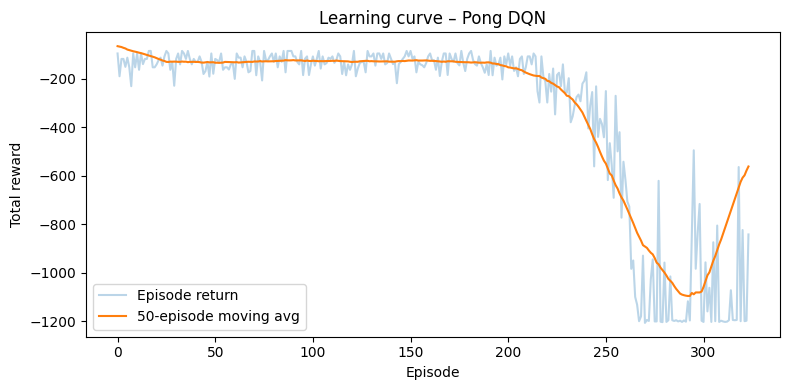

In [4]:
### Generate plot based on rewards

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: extract run_stamp from file name if needed
run_stamp = "2025-05-31_15-19-55"  # Replace with actual value or extract programmatically

# Load CSV and extract the returns
df = pd.read_csv(f"logs/pong_returns_{run_stamp}.csv")  # Replace <run_stamp> with the actual timestamp
episode_returns = df["return"].tolist()


# Plot return per episode
window = 50
returns = np.array(episode_returns, dtype=float)
kernel = np.ones(window) / window
ma = np.convolve(returns, kernel, mode="same")

plt.figure(figsize=(8, 4))
plt.plot(returns, label="Episode return", alpha=0.3)
plt.plot(ma, label=f"{window}-episode moving avg")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Learning curve – Pong DQN")
plt.legend()
plt.tight_layout()
plt.savefig(f"logs/return_curve_{run_stamp}.png")
print(f"Plot return per episode saved to: logs/return_curve_{run_stamp}.png")


Plot return per episode saved to: logs/return_curve_2025-05-31_15-19-55.png


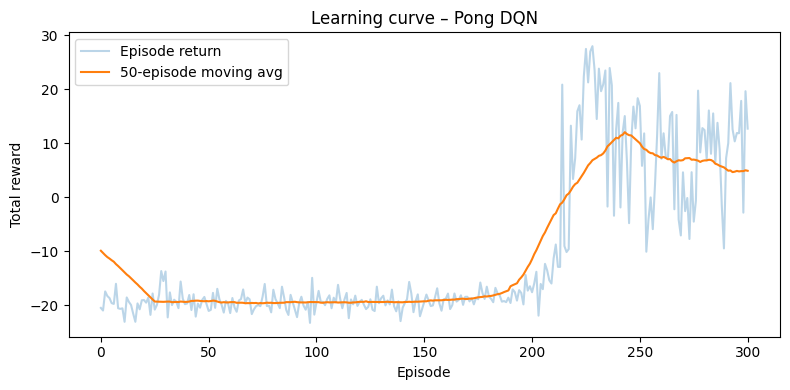

In [6]:
### Generate plot based on rewards

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: extract run_stamp from file name if needed
csv_path = "../DA2/logs/pong_returns_2025-05-31_16-35-14.csv"  # Replace with actual value or extract programmatically

# Load CSV and extract the returns
df = pd.read_csv(csv_path)  # Replace <run_stamp> with the actual timestamp
episode_returns = df["return"].tolist()


# Plot return per episode
window = 50
returns = np.array(episode_returns, dtype=float)
kernel = np.ones(window) / window
ma = np.convolve(returns, kernel, mode="same")

plt.figure(figsize=(8, 4))
plt.plot(returns, label="Episode return", alpha=0.3)
plt.plot(ma, label=f"{window}-episode moving avg")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Learning curve – Pong DQN")
plt.legend()
plt.tight_layout()
print(f"Plot return per episode saved to: logs/return_curve_{run_stamp}.png")


Plot saved to: logs/return_curve_comparison.png


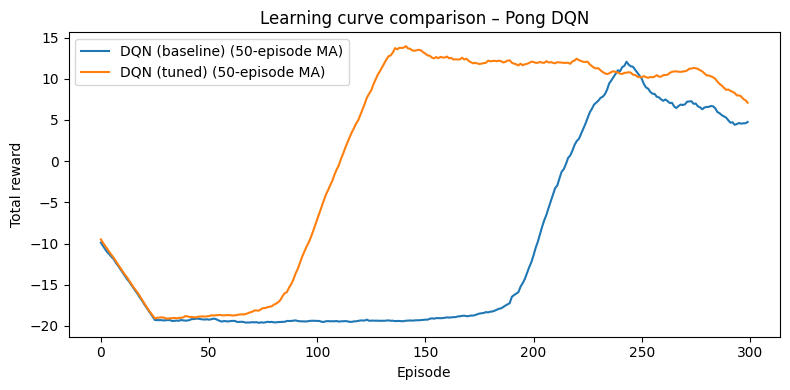

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define CSV paths and tags
csv_1_path = "../DA2/logs/pong_returns_2025-05-31_16-35-14.csv"
csv_2_path = "pong_returns_to_plot.csv"
tag_1 = "DQN (base)"
tag_2 = "DQN (human)"

# Load CSVs
df1 = pd.read_csv(csv_1_path)
df2 = pd.read_csv(csv_2_path)

# Extract and trim to the minimum length
min_len = min(len(df1), len(df2))
returns1 = df1["return"].tolist()[:min_len]
returns2 = df2["return"].tolist()[:min_len]

# Compute moving averages
window = 50
kernel = np.ones(window) / window
ma1 = np.convolve(np.array(returns1, dtype=float), kernel, mode="same")
ma2 = np.convolve(np.array(returns2, dtype=float), kernel, mode="same")

# Plot
plt.figure(figsize=(8, 4))
plt.plot(ma1, label=f"{tag_1} ({window}-episode MA)")
plt.plot(ma2, label=f"{tag_2} ({window}-episode MA)")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Learning curve comparison – Pong DQN")
plt.legend()
plt.tight_layout()
plt.savefig("logs/return_curve_comparison.png")
print("Plot saved to: logs/return_curve_comparison.png")
